In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('takehome_users.csv',encoding='latin-1')
df2 = pd.read_csv('takehome_user_engagement.csv')

In [44]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [20]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
print(df1.shape)
print(df2.shape)

(12000, 10)
(207917, 3)


We will use df2 to check if the user is an 'adopter user' or not, then add a column for that in df1. 


In [31]:
gdf=df2.groupby(by='user_id').sum()
mt2df=gdf.loc[gdf.visited>2]
potential = mt2df.index

In [68]:
df2['possible']=df2.user_id.isin(potential)
df2.head()

,time_stamp,user_id,visited,possible
0,2014-04-22 03:53:30,1,1,False
1,2013-11-15 03:45:04,2,1,True
2,2013-11-29 03:45:04,2,1,True
3,2013-12-09 03:45:04,2,1,True
4,2013-12-25 03:45:04,2,1,True


In [80]:
df2["possible"] = df2["possible"].astype(int)

In [159]:
df2=df2.loc[df2.possible==1]
df2.describe()

,user_id,visited,possible
count,201002.000000,201002.0,201002.0
mean,5910.012492,1.0,1.0
std,3392.554039,0.0,0.0
min,2.000000,1.0,1.0
25%,3087.000000,1.0,1.0
50%,5682.000000,1.0,1.0
75%,8944.000000,1.0,1.0
max,11991.000000,1.0,1.0


In [153]:
df2['time_stamp']=pd.to_datetime(df2['time_stamp'])
df2.drop

In [180]:
a=df2.loc[df2.user_id==2]
a

,time_stamp,user_id,visited,possible
1,2013-11-15 03:45:04,2,1,1
2,2013-11-29 03:45:04,2,1,1
3,2013-12-09 03:45:04,2,1,1
4,2013-12-25 03:45:04,2,1,1
5,2013-12-31 03:45:04,2,1,1
6,2014-01-08 03:45:04,2,1,1
7,2014-02-03 03:45:04,2,1,1
8,2014-02-08 03:45:04,2,1,1
9,2014-02-09 03:45:04,2,1,1
10,2014-02-13 03:45:04,2,1,1


In [114]:
delta=a['time_stamp'][3]-a['time_stamp'][2]

In [181]:
sep=[]
a.reset_index(drop=True)
for i in range(1,len(a['time_stamp'])-2):
    t=a['time_stamp'][i+2]-a['time_stamp'][i]
    sep.append(t.days)
min(sep)

5

In [121]:
len(a['time_stamp'])

14

In [192]:
ids=[]
for id in df2.user_id.unique():
    a=df2.loc[df2.user_id==id]
    a.reset_index(drop=True,inplace=True)
    sep=[]
    if len(a['time_stamp'])>3:
        for i in range(1,len(a['time_stamp'])-2):
            t=a['time_stamp'][i+2]-a['time_stamp'][i]
            sep.append(t.days)
    else:
        t=a['time_stamp'][2]-a['time_stamp'][0]
        sep.append(t.days)
    if min(sep)<=7:
        ids.append(id)

In [190]:
len(df2.user_id.unique())

2248

In [193]:
len(ids)

1616

In [194]:
ids

[2,
 10,
 33,
 42,
 43,
 50,
 53,
 60,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 345,
 347,
 351,
 362,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 520,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 717,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1039,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1212,
 12

In [200]:
df1['adopted']=0
for i in range(len(df1['object_id'])):
    if i+1 in ids:
        df1['adopted'][i]=1
    else:
        df1['adopted'][i]=0

/var/folders/1j/ls8q4cg97hn3bvrkmbd7ksl80000gn/T/ipykernel_40173/3454681197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['adopted'][i]=0
/var/folders/1j/ls8q4cg97hn3bvrkmbd7ksl80000gn/T/ipykernel_40173/3454681197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['adopted'][i]=1


In [201]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [222]:
a=df1['invited_by_user_id'].unique()

In [223]:
a=a[~np.isnan(a)]

We will get more information by simplfying this column to a 1, and 0. if the user was invited then we will put in 1, if not it's 0

In [226]:
df1['invited_by_user_id']=df1['invited_by_user_id'].replace(a,1)

In [230]:
df1['invited_by_user_id']=df1['invited_by_user_id'].fillna(0)

In [233]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0,0


Looking at the dataset, we can see that the first 4 columns won't provide much value, furthermore, we can impute the median for last_session_creation_time as it is numerical not datetime

In [294]:
df = df1.drop(columns=['object_id','creation_time','name','email'])

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   last_session_creation_time  8823 non-null   float64
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          12000 non-null  float64
 6   adopted                     12000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 656.4+ KB


In [297]:
df['last_session_creation_time']=df['last_session_creation_time'].fillna(df['last_session_creation_time'].mean())

In [298]:
df['last_session_creation_time'] = pd.to_numeric(df['last_session_creation_time'])

<AxesSubplot:>

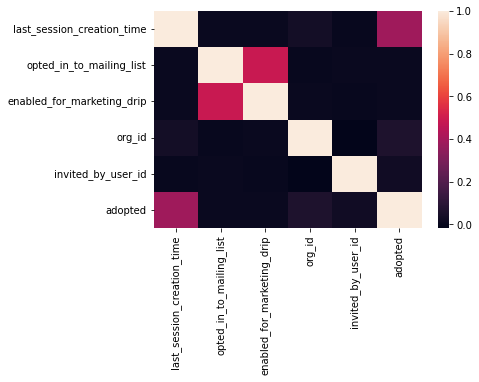

In [300]:
sns.heatmap(df.corr())

As we can see here, the correlation is low with most columns, so we will see how that translate to our models

In [301]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
numeric_df=df.select_dtypes(include=np.number).drop(columns=['adopted'])
object_df=df.select_dtypes(exclude=np.number)

In [302]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
names=numeric_df.columns
scaled_df = pd.DataFrame(scaled_df, columns=names) 
scaled_df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1.126184,1.734363,-0.418985,-1.055082,0.932755
1,1.012649,-0.576580,-0.418985,-1.135694,0.932755
2,-0.928225,-0.576580,-0.418985,-0.386006,0.932755
3,-0.601272,-0.576580,-0.418985,-1.135694,0.932755
4,-1.219944,-0.576580,-0.418985,0.412050,0.932755


In [303]:
dummies=pd.get_dummies(object_df)
dummies.head()

,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   last_session_creation_time  12000 non-null  float64
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          12000 non-null  float64
 6   adopted                     12000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 656.4+ KB


In [305]:
pp_df=pd.concat([scaled_df,dummies,df['adopted']],axis=1)
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          12000 non-null  float64
 1   opted_in_to_mailing_list            12000 non-null  float64
 2   enabled_for_marketing_drip          12000 non-null  float64
 3   org_id                              12000 non-null  float64
 4   invited_by_user_id                  12000 non-null  float64
 5   creation_source_GUEST_INVITE        12000 non-null  uint8  
 6   creation_source_ORG_INVITE          12000 non-null  uint8  
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 8   creation_source_SIGNUP              12000 non-null  uint8  
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 10  adopted                             12000 non-null  int64  
dtypes: float64(5), int64(1), uint8(5)
memory 

In [306]:
pp_df.shape

(12000, 11)

In [307]:
y=pp_df['adopted']
X=pp_df.loc[:, pp_df.columns!='adopted']
X.shape

(12000, 10)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.3, 
                                   shuffle=True)

In [309]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)


0.8711111111111111

In [310]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)


0.9127777777777778

In [311]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)


0.865

As we can see here, the best model here has an accuracy of 91.3%, which is a decent model considering the dataset is imbalanced. Now we need to see what are the best features that contributed to the model, and check feature importance and what the company could focus on 

In [312]:
importances = rfc.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) last_session_creation_time     0.751639
 2) org_id                         0.214067
 3) opted_in_to_mailing_list       0.008430
 4) enabled_for_marketing_drip     0.008048
 5) creation_source_PERSONAL_PROJECTS 0.004556
 6) creation_source_SIGNUP_GOOGLE_AUTH 0.002899
 7) creation_source_ORG_INVITE     0.002895
 8) creation_source_GUEST_INVITE   0.002692
 9) creation_source_SIGNUP         0.002662
10) invited_by_user_id             0.002113


As we can see here the most important feature is last_session_creation_time, and then org_id. After that, there is a massive drop down to less than 1% importance